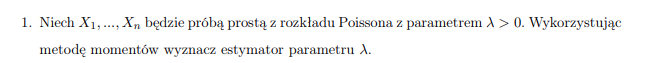

In [1]:
import numpy as np
import matplotlib.pyplot as plt

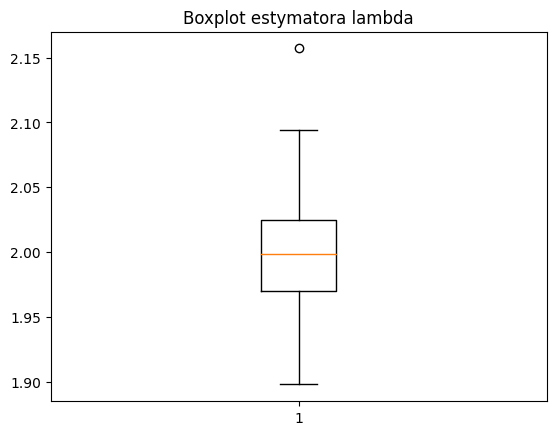

In [4]:
n_pois = 1000
n_samples = 100
lambda_ = 2
samples_pois = [np.random.poisson(lambda_, n_pois) for n in range(n_samples)]
lambda_estims = [np.mean(sample_pois) for sample_pois in samples_pois]
plt.boxplot(lambda_estims)
plt.title("Boxplot estymatora lambda")
plt.show()

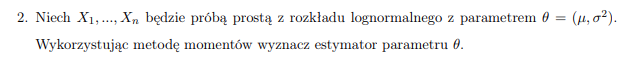

In [3]:
n_lognorm = 1000
mi = 2
sigma = 1
samples_lognorm = [np.random.lognormal(mi, sigma, n_lognorm) for n in range(n_samples)]

In [4]:
def mi_estim(sample):
    n = len(sample)
    return 2*np.log(np.mean(sample)) - 0.5 * np.log(1/n) - 0.5 * np.log(sum(sample**2))

In [5]:
def sigma_estim(sample):
    n = len(sample)
    return np.log(1/n) + np.log(sum(sample**2)) - 2*np.log(np.mean(sample))

In [6]:
mis, sigmas = [mi_estim(sam) for sam in samples_lognorm], [sigma_estim(sam) for sam in samples_lognorm]

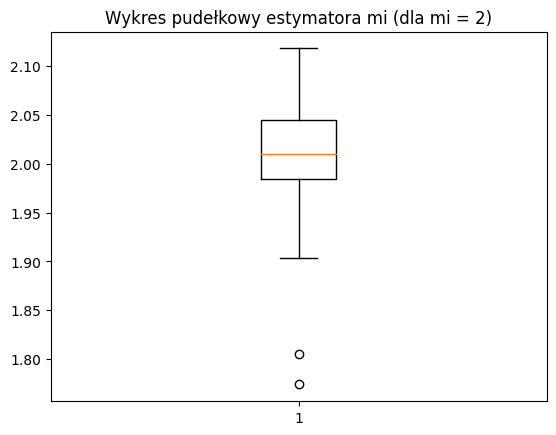

In [10]:
plt.boxplot(mis)
plt.title(f"Wykres pudełkowy estymatora mi (dla mi = {mi})")
plt.show()

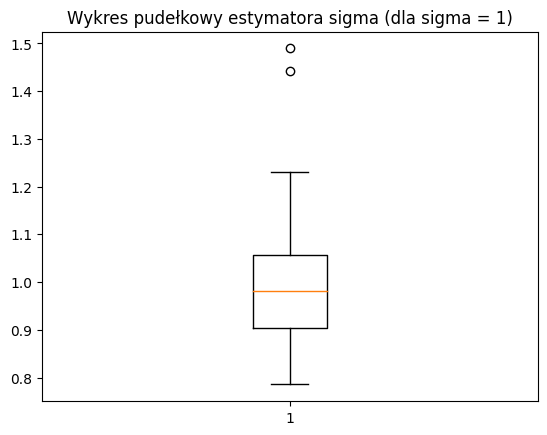

In [11]:
plt.boxplot(sigmas)
plt.title(f"Wykres pudełkowy estymatora sigma (dla sigma = {sigma})")
plt.show()

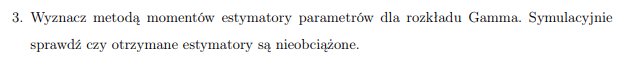

In [21]:
n_gamma = 1000
alpha = 2
beta = 1
samples_gamma = [np.random.gamma(alpha, beta, n_gamma) for n in range(n_samples)]

In [13]:
def alpha_estim(samples):
    n = len(samples)
    return (np.mean(samples))**2/(1/n * np.sum(samples**2) - (np.mean(samples))**2)

In [14]:
def beta_estim(samples):
    n = len(samples)
    return np.mean(samples)/(1/n * np.sum(samples**2) - (np.mean(samples))**2)

In [22]:
alphas, betas = [alpha_estim(sam) for sam in samples_gamma], [beta_estim(sam) for sam in samples_gamma]

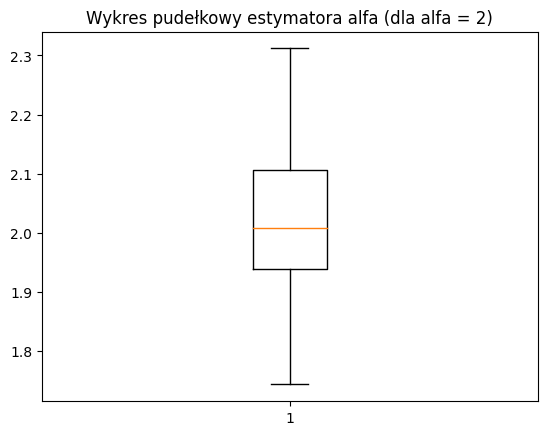

In [23]:
plt.boxplot(alphas)
plt.title(f"Wykres pudełkowy estymatora alfa (dla alfa = {alpha})")
plt.show()

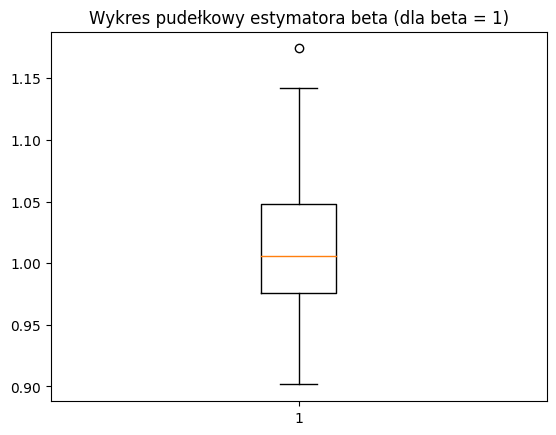

In [24]:
plt.boxplot(betas)
plt.title(f"Wykres pudełkowy estymatora beta (dla beta = {beta})")
plt.show()

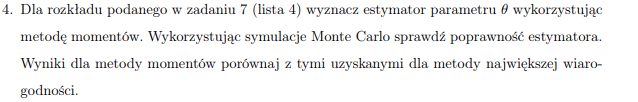

In [2]:
def y_simul(n, theta):
    U = np.random.uniform(0,1,n)
    return np.log(1/(1-U)) + theta


In [5]:
n_y = 1000
theta = 1
samples_y = [y_simul(n_y, theta) for n in range(n_samples)]

In [6]:
thetas_momenty = [np.mean(sam) - 1 for sam in samples_y]
thetas_mnw = [np.min(sam) for sam in samples_y]

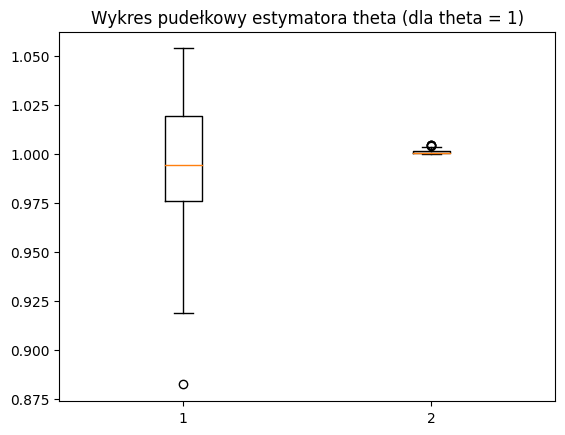

In [11]:
plt.boxplot([thetas_momenty, thetas_mnw])
plt.title(f"Wykres pudełkowy estymatora theta (dla theta = {theta})")
plt.show()

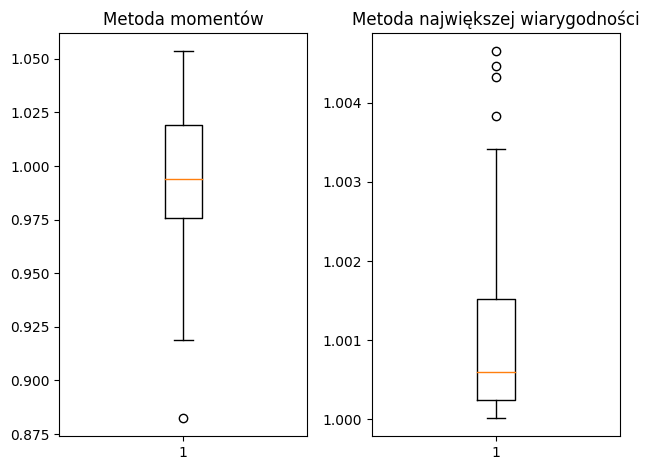

In [14]:
fig, axis = plt.subplots(1,2)

axis[0].boxplot(thetas_momenty)
axis[0].set_title("Metoda momentów")

axis[1].boxplot(thetas_mnw)
axis[1].set_title("Metoda największej wiarygodności")
plt.tight_layout()
plt.show()

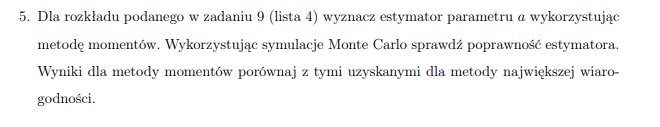

In [44]:
def x_simul(a, n):
    u = np.random.rand(n)
    return np.power(u, 1/(a+1))

In [50]:
n_x = 1000
a = 1
samples_x = [x_simul(a, n_x) for n in range(n_samples)]

In [46]:
def a_momenty(sample):
    return (2*np.mean(sample)-1)/(1-np.mean(sample))

In [47]:
def a_mnw(sample):
    n = len(sample)
    return -1 - n/(sum(np.log(sample)))

In [51]:
a_estim_momenty = [a_momenty(sam) for sam in samples_x]
a_estim_mnw = [a_mnw(sam) for sam in samples_x]

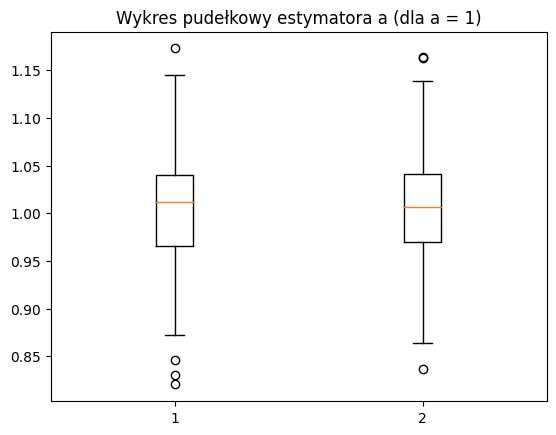

In [52]:
plt.boxplot([a_estim_momenty, a_estim_mnw])
plt.title(f"Wykres pudełkowy estymatora a (dla a = {a})")
plt.show()